In [ ]:
#setwd("~/LAB")
rm(list=ls())

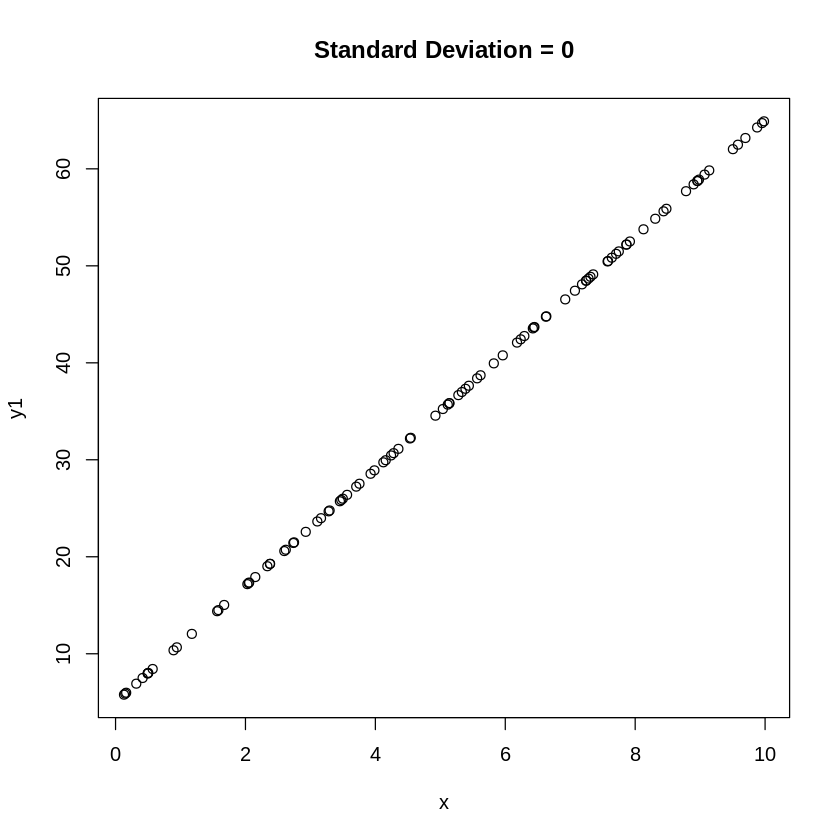

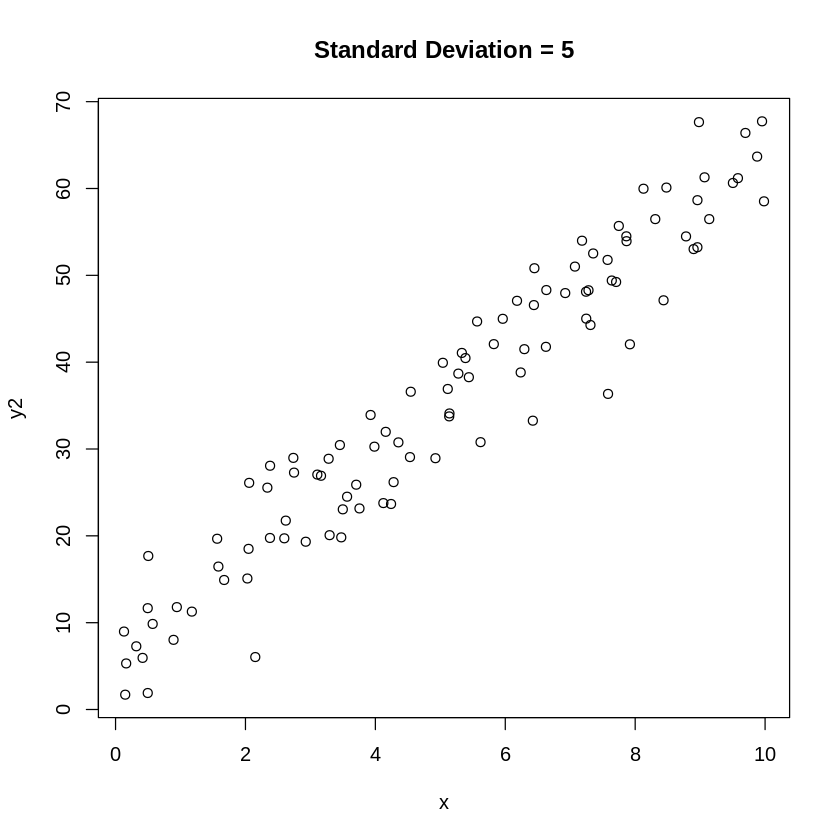

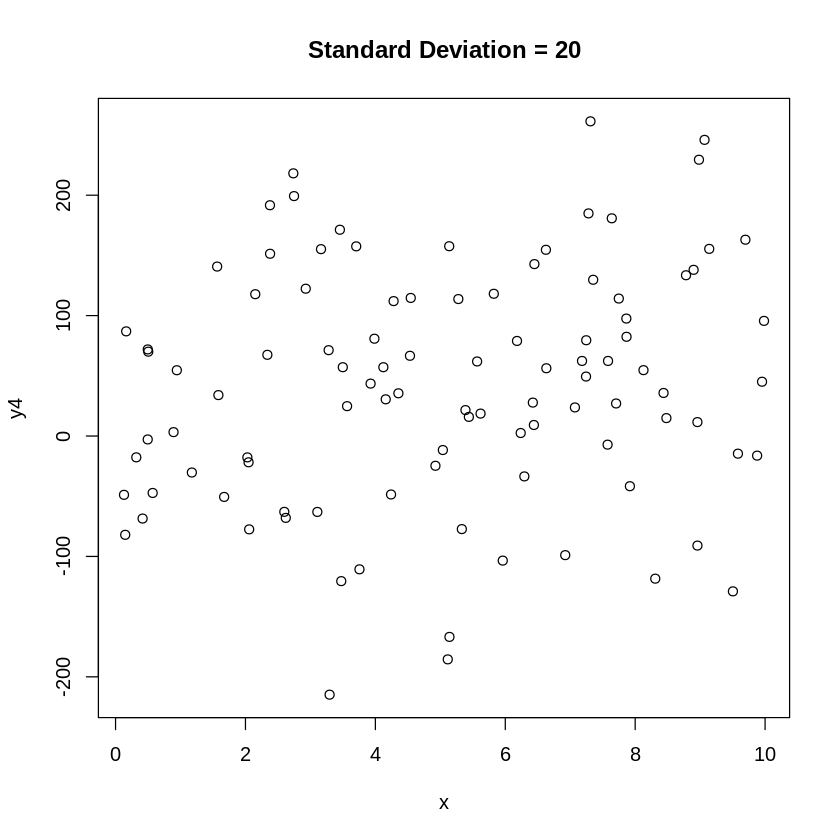

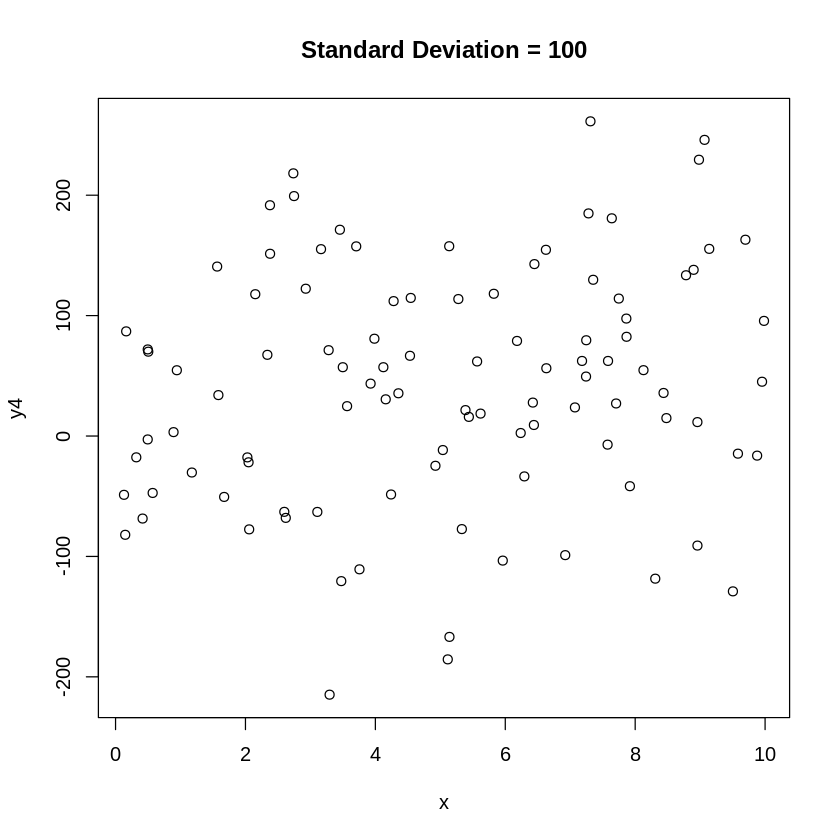

In [ ]:
#=============================Part(1)=====================================
x <- runif(100, 0, 10)     # 100 draws between 0 & 10

#(Q1) Try changing the value of standard deviation (sd) in the next command
#How do the data points change for different values of standard deviation?

#Answer: 
"
The change in the standard deviation changes the variance of the noise in the input data so for large standard deviation the points are more scattered from the line and for small standard deviation the points are very close to a line i.e. the square error is minimal and will equal zero when standard deviation = 0.
"
y1 <- 5 + 6*x + rnorm(100, sd = 0)  # default values for rnorm (mean = 0 and sigma = 1)
y2 <- 5 + 6*x + rnorm(100, sd = 5)
y3 <- 5 + 6*x + rnorm(100, sd = 20)
y4 <- 5 + 6*x + rnorm(100, sd = 100)

#Plot it
plot(x, y1, main = "Standard Deviation = 0")  # In this case, the variability introduced by the random numbers will be extremely small, so the data points will almost align perfectly along the line y=5+6x.
plot(x, y2, main = "Standard Deviation = 5")    # In this case, the data points will be relatively close to the line y=5+6x with less spread around it.
plot(x, y4, main = "Standard Deviation = 20")    # With a larger standard deviation, the data points will be more spread out from the line y=5+6x, potentially showing more variability in the data.
plot(x, y4, main = "Standard Deviation = 100")
#========================================================================


In [ ]:
# OLS model
# OLS : Ordinary Least Squares
model1 <- lm(y1 ~ x)
model2 <- lm(y2 ~ x)
model3 <- lm(y3 ~ x)
model4 <- lm(y4 ~ x)

# Learn about this object by saying ?lm and str(d)

# Compact model results
print(model1)
print(model2)
print(model3)
print(model4)


#(Q2) How are the coefficients of the linear model affected by changing the value
#of standard deviation in Q1?

"
The intercept coefficient represents the value of y when x=0 ==> bias.
The coefficient for x represents the change in y for a unit change in x.

Intercept: reflects the varying mean values of y at x = 0 due to different standard deviations.

Slope: The slopes are somewhat consistent across the models but with slight variations.
This implies that changing the standard deviation affects the spread of the data points around the regression line,
which can influence the estimation of the slope to some extent. However the changes in the slopes are relatively minor.

"


Call:
lm(formula = y1 ~ x)

Coefficients:
(Intercept)            x  
          5            6  


Call:
lm(formula = y2 ~ x)

Coefficients:
(Intercept)            x  
      6.079        5.810  


Call:
lm(formula = y3 ~ x)

Coefficients:
(Intercept)            x  
      8.701        5.586  


Call:
lm(formula = y4 ~ x)

Coefficients:
(Intercept)            x  
     12.106        5.673  



[1] "\nThe intercept coefficient represents the value of y when x=0 ==> bias.\nThe coefficient for x represents the change in y for a unit change in x.\n\nIntercept: reflects the varying mean values of y at x = 0 due to different standard deviations.\n\nSlope: The slopes are somewhat consistent across the models but with slight variations. \nThis implies that changing the standard deviation affects the spread of the data points around the regression line, \nwhich can influence the estimation of the slope to some extent. However the changes in the slopes are relatively minor.\n\n"

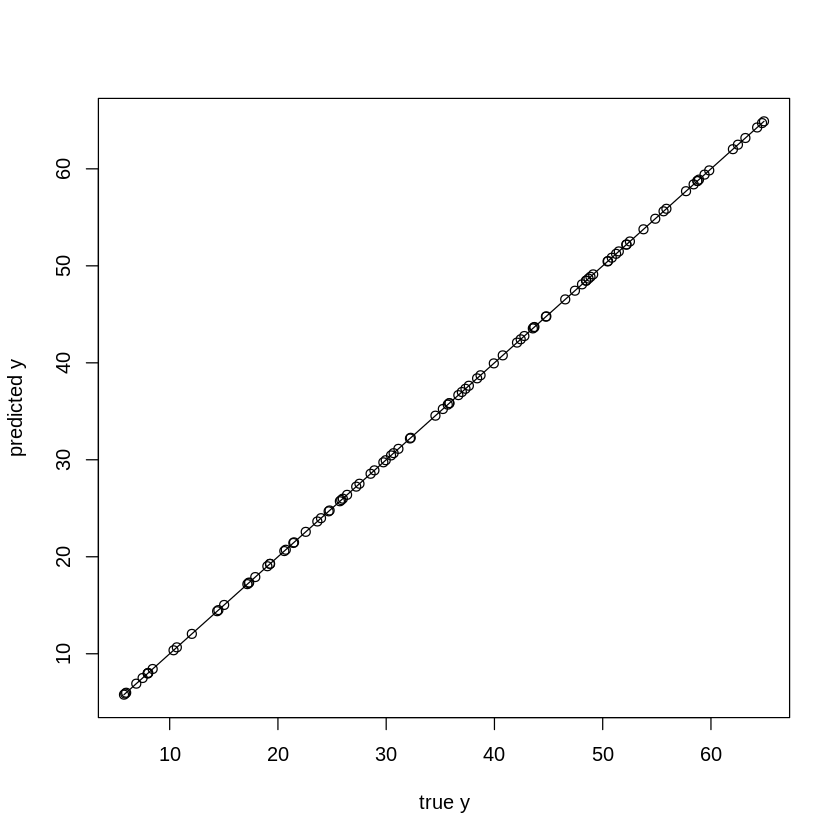

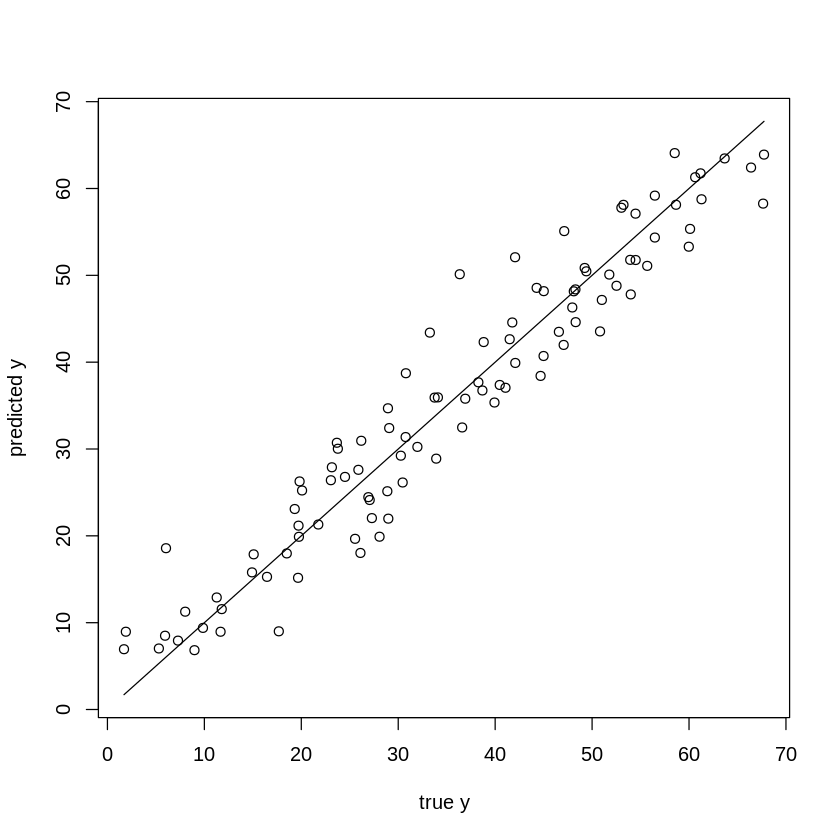

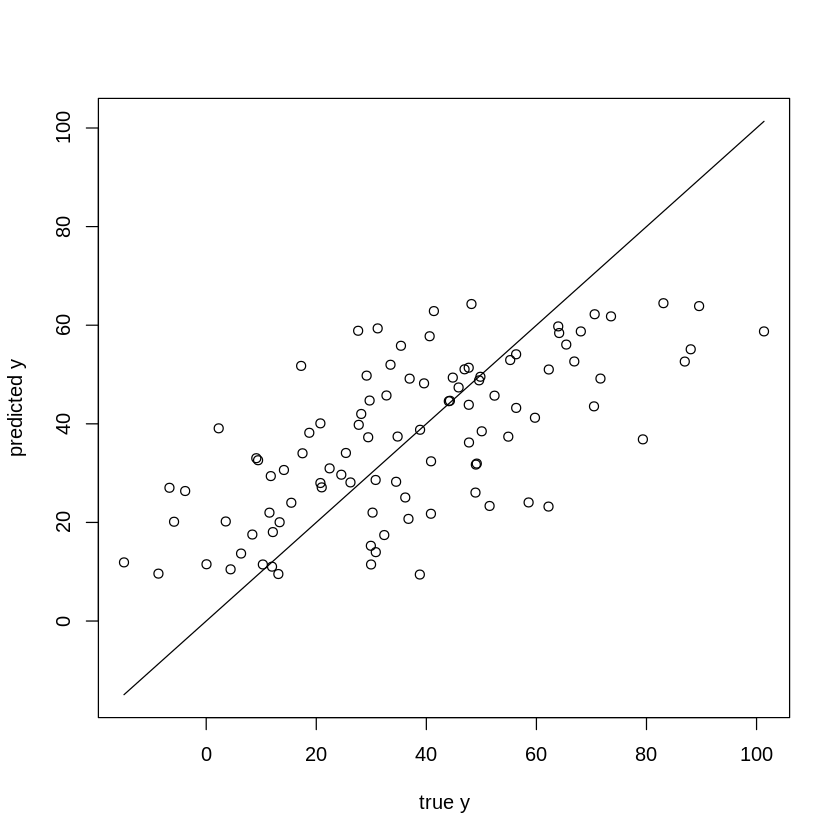

Warning message in summary.lm(model1):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = y1 ~ x)

Coefficients:
(Intercept)            x  
          5            6  


Call:
lm(formula = y2 ~ x)

Coefficients:
(Intercept)            x  
      6.079        5.810  


Call:
lm(formula = y3 ~ x)

Coefficients:
(Intercept)            x  
      8.701        5.586  


Call:
lm(formula = y4 ~ x)

Coefficients:
(Intercept)            x  
     12.106        5.673  



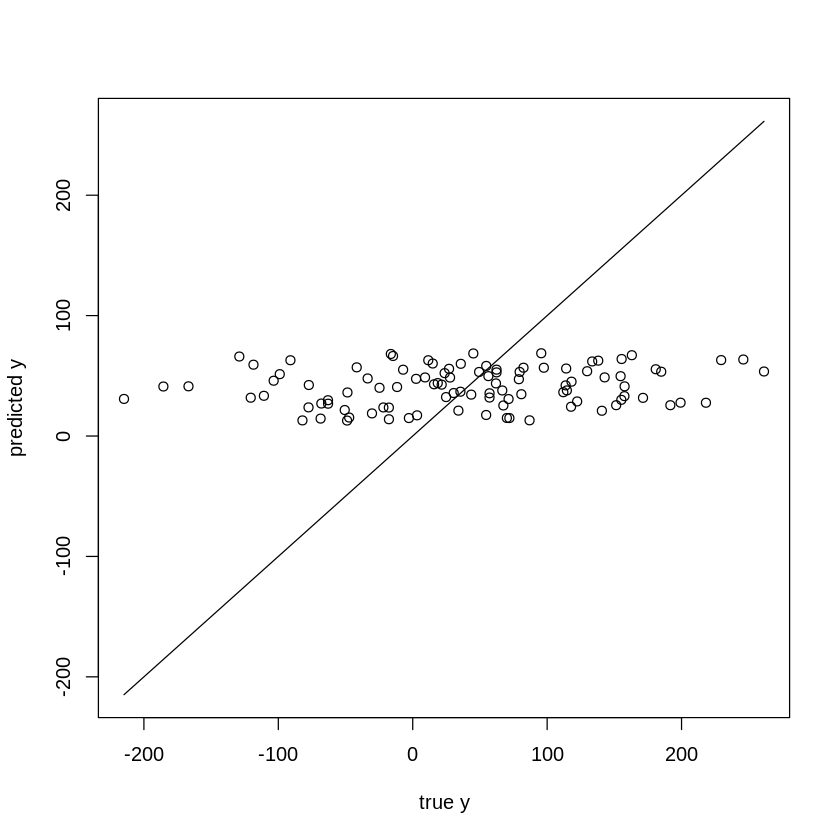

In [ ]:
# Regression diagnostics --
ypred1 <- predict(model1) # use the trained model to predict the same training data
# Learn about predict by saying ?predict.lm
ypred2 <- predict(model2)
ypred3 <- predict(model3)
ypred4 <- predict(model4)

par(mfrow=c(1,1))
plot(y1,y1, type="l", xlab="true y", ylab="predicted y") # ploting the ideal line
points(y1, ypred1) # plotting the predicted points
                 # the nearer to the ideal line the better

par(mfrow=c(1,1))
plot(y2,y2, type="l", xlab="true y", ylab="predicted y") # ploting the ideal line
points(y2, ypred2) # plotting the predicted points
                 # the nearer to the ideal line the better

par(mfrow=c(1,1))
plot(y3,y3, type="l", xlab="true y", ylab="predicted y") # ploting the ideal line
points(y3, ypred3) # plotting the predicted points
                 # the nearer to the ideal line the better

par(mfrow=c(1,1))
plot(y4,y4, type="l", xlab="true y", ylab="predicted y") # ploting the ideal line
points(y4, ypred4) # plotting the predicted points
                 # the nearer to the ideal line the better


# Detailed model results
d1 <- summary(model1)
print(model1)

d2 <- summary(model2)
print(model2)

d3 <- summary(model3)
print(model3)

d4 <- summary(model4)
print(model4)

#(Q3) How is the value of R-squared affected by changing the value
#of standard deviation in Q1?
"
When the standard deviation increases, the R-squared value decreases.                R-squared values range between 0 and 1, where 1 indicates that all variation in the dependent variable (y) can be explained by the independent variable (x) and the intercept.                                                                                                                        R-squared represents the dispersion or scattering of data points around the regression line; the greater the scattering, the lower the R-squared value.
"

OLS gave slope of  6 and an R-sqr of  1 
OLS gave slope of  5.809582 and an R-sqr of  0.9248194 


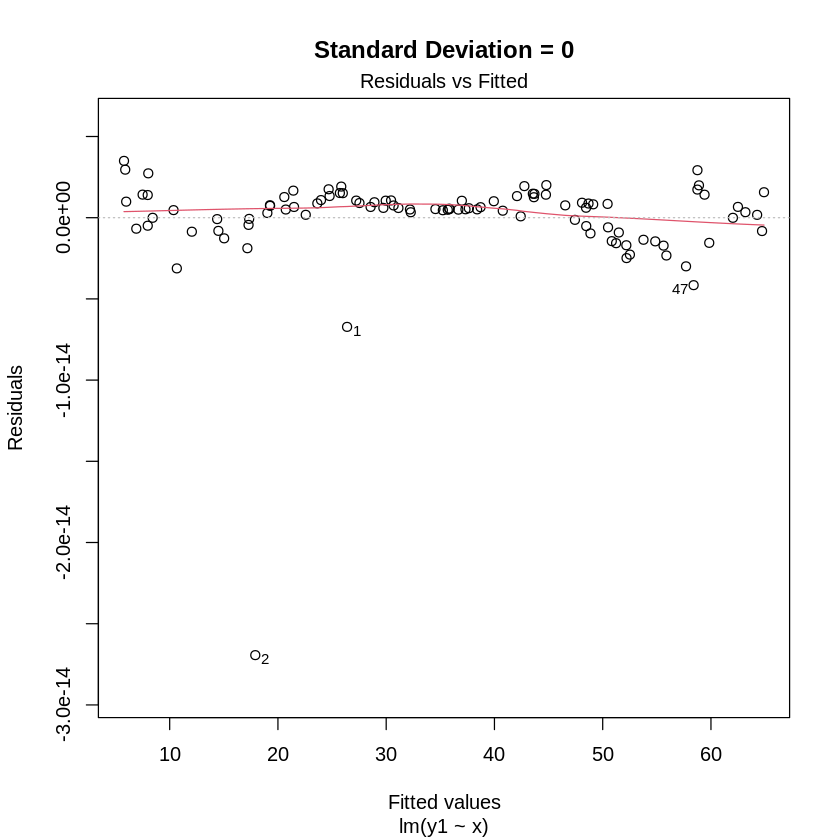

OLS gave slope of  5.585867 and an R-sqr of  0.4317443 


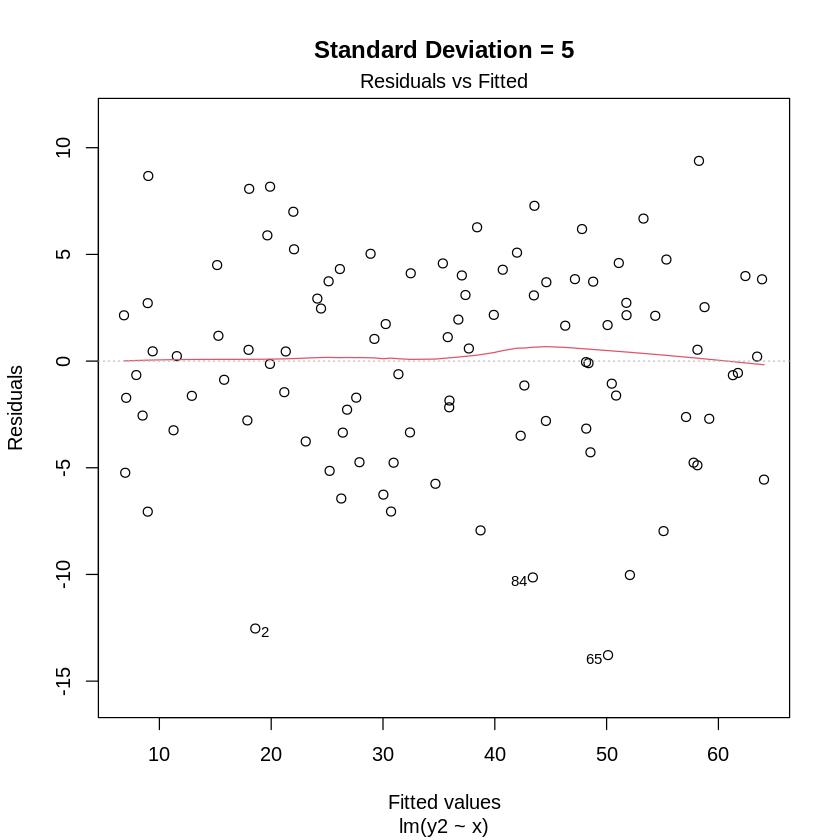

OLS gave slope of  5.672638 and an R-sqr of  0.02674848 


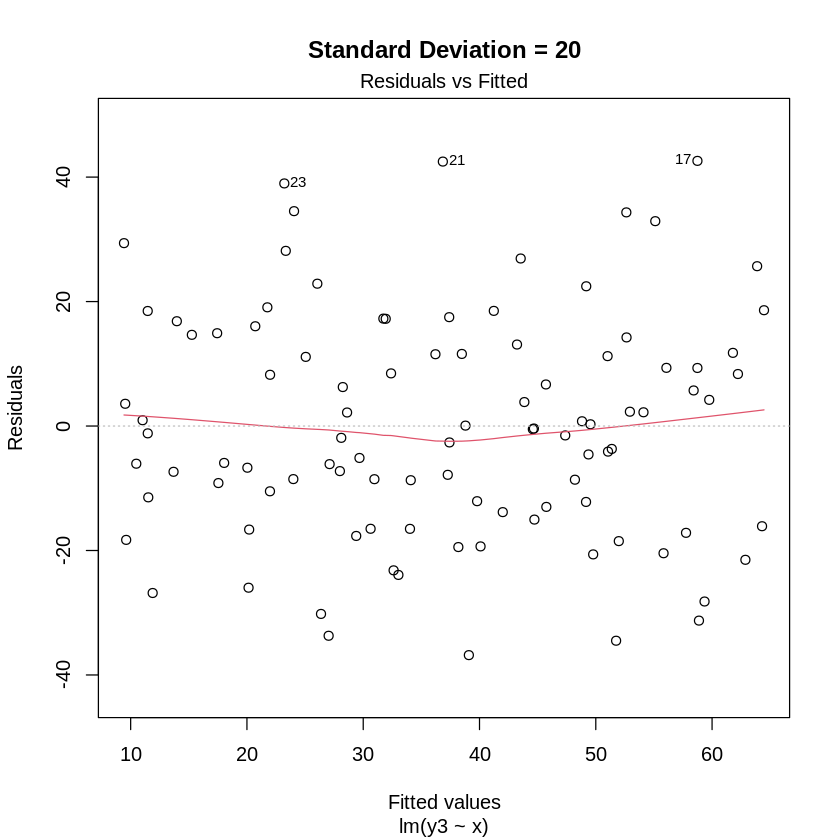

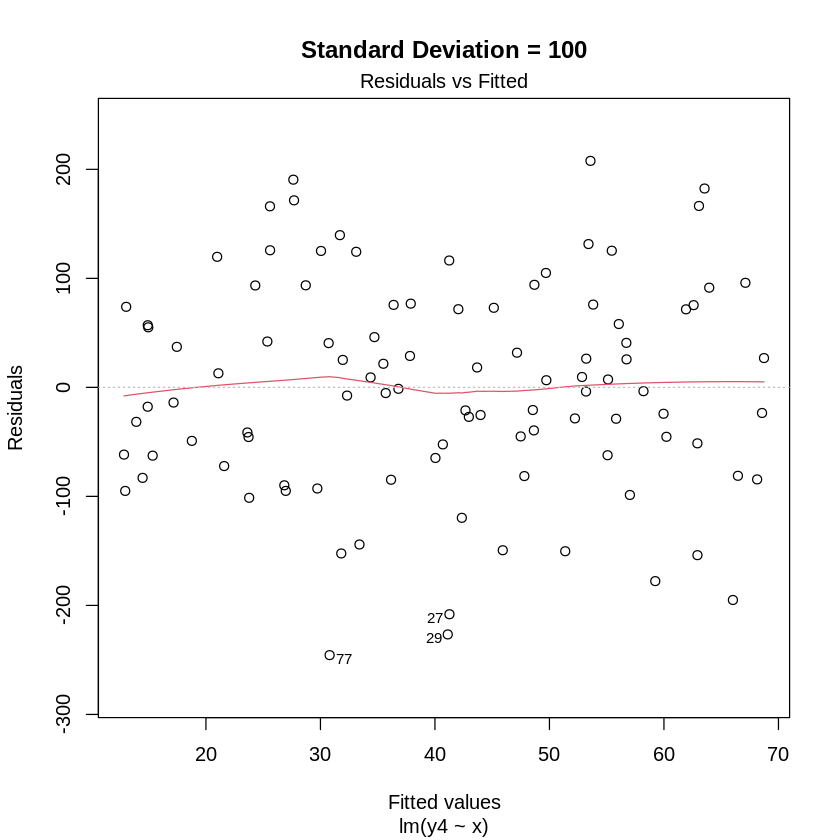

In [ ]:
# Learn about this object by saying ?summary.lm and by saying str(d)
cat("OLS gave slope of ", d1$coefficients[2,1],
    "and an R-sqr of ", d1$r.squared, "\n")

#Graphic dignostic (cont.)
par(mfrow=c(1,1)) # parameters for the next plot
plot(model1, 1, main = "Standard Deviation = 0") # plot one diagnostic graphs


cat("OLS gave slope of ", d2$coefficients[2,1],
    "and an R-sqr of ", d2$r.squared, "\n")
par(mfrow=c(1,1))
plot(model2, 1, main = "Standard Deviation = 5")

cat("OLS gave slope of ", d3$coefficients[2,1],
    "and an R-sqr of ", d3$r.squared, "\n")
par(mfrow=c(1,1))
plot(model3, 1, main = "Standard Deviation = 20")

cat("OLS gave slope of ", d4$coefficients[2,1],
    "and an R-sqr of ", d4$r.squared, "\n")
par(mfrow=c(1,1))
plot(model4, 1, main = "Standard Deviation = 100")


#(Q4)What do you conclude about the residual plot? Is it a good residual plot?
"
The residual values offer a measure of the goodness of fit, indicating how well the line fits the data.                                                                                                        Despite observing a linear pattern in the plot and generating the data with constant variance, we observe significant residual values when the standard deviation is large.                                                                                                              This suggests that the model doesn’t fit the data very well and the noise is high.
"
#========================End of Part(1)==============================================



Call:
lm(formula = y1 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2315 -0.7458  0.1289  0.6513  2.4190 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.7708     0.1729   27.59   <2e-16 ***
x1            6.4205     0.3212   19.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9588 on 98 degrees of freedom
Multiple R-squared:  0.803,	Adjusted R-squared:  0.801 
F-statistic: 399.5 on 1 and 98 DF,  p-value: < 2.2e-16


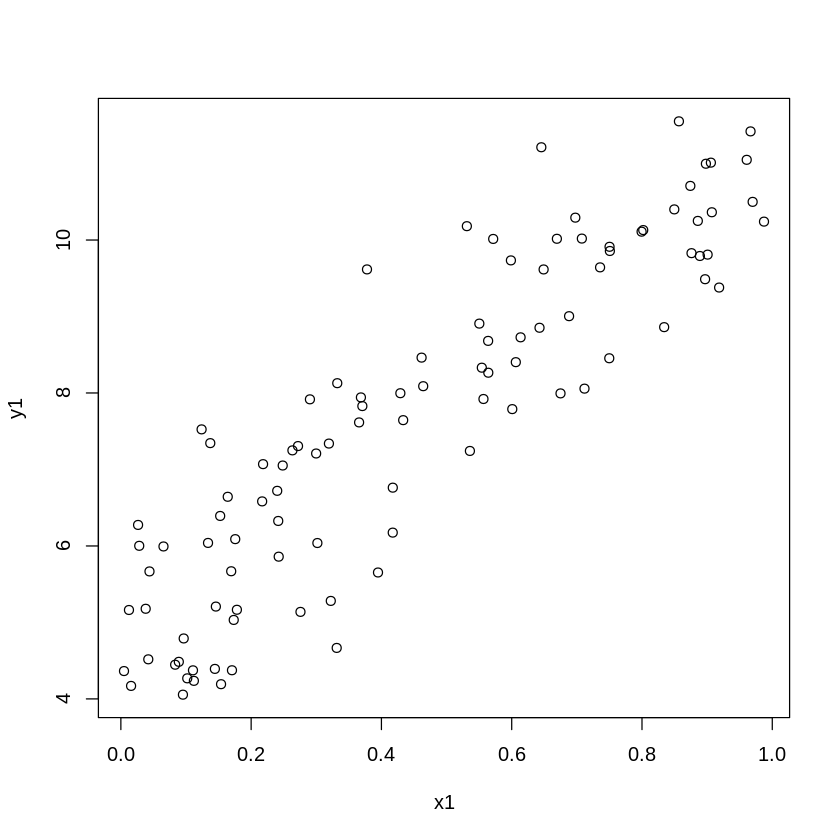


Call:
lm(formula = y2 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4828 -0.6827  0.1266  0.5617  2.1310 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1832     0.1734   24.12   <2e-16 ***
x1           11.3196     0.3222   35.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9617 on 98 degrees of freedom
Multiple R-squared:  0.9265,	Adjusted R-squared:  0.9257 
F-statistic:  1235 on 1 and 98 DF,  p-value: < 2.2e-16


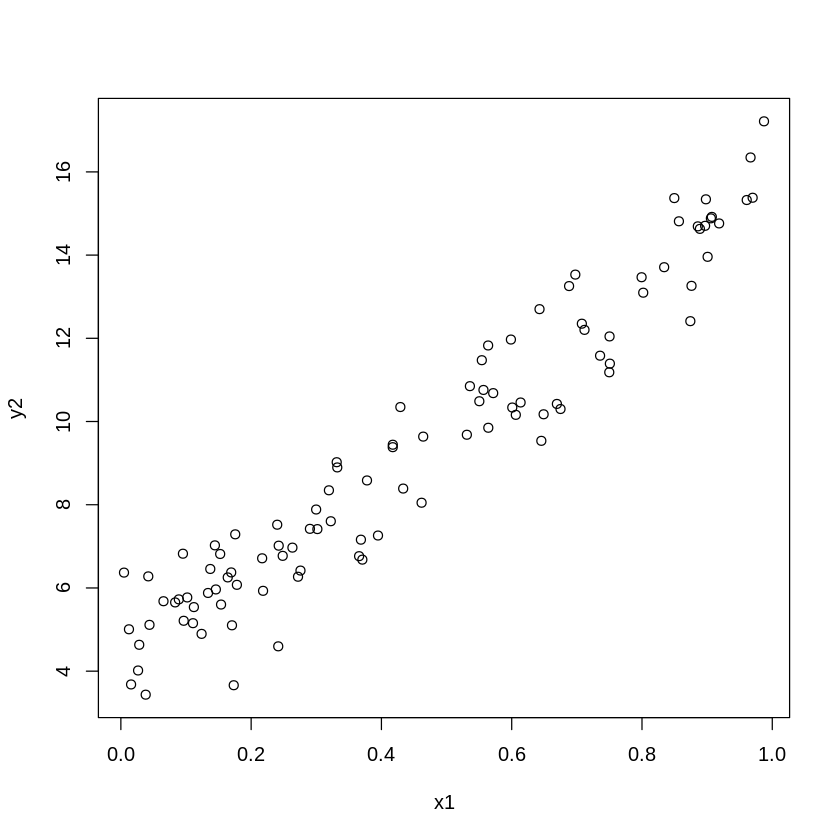


Call:
lm(formula = y3 ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2955 -1.5725 -0.2326  1.5009  4.4210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.0600     0.3560   5.787 8.61e-08 ***
x1           25.5038     0.6612  38.571  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.974 on 98 degrees of freedom
Multiple R-squared:  0.9382,	Adjusted R-squared:  0.9376 
F-statistic:  1488 on 1 and 98 DF,  p-value: < 2.2e-16


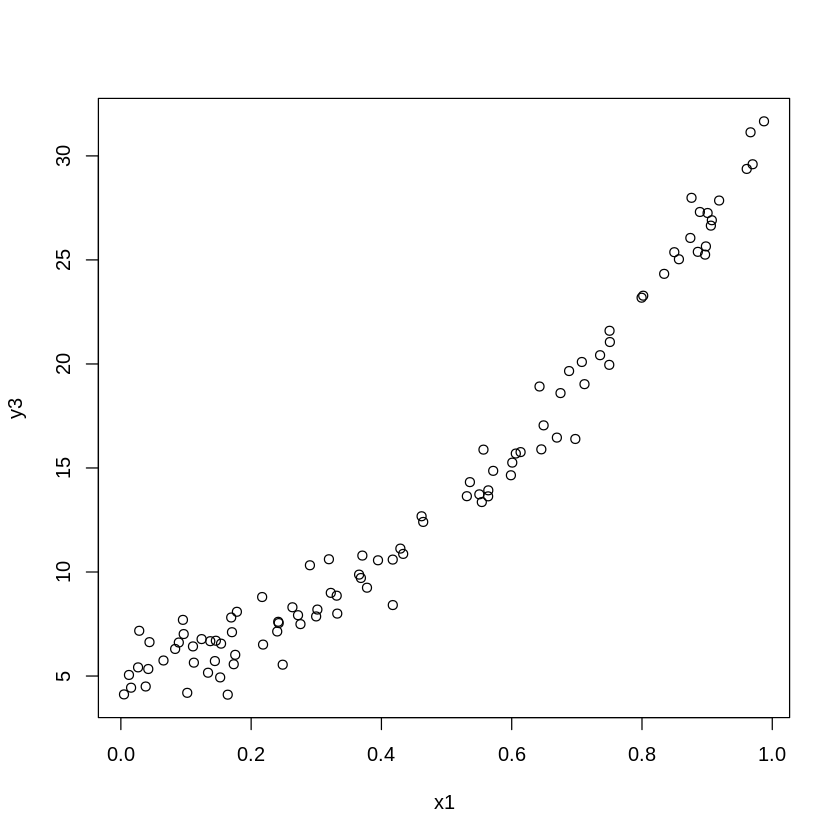


Call:
lm(formula = y4 ~ x1)

Residuals:
   Min     1Q Median     3Q    Max 
-9.922 -7.054 -1.315  6.530 15.841 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -8.956      1.347   -6.65 1.68e-09 ***
x1           102.174      2.502   40.84  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.468 on 98 degrees of freedom
Multiple R-squared:  0.9445,	Adjusted R-squared:  0.9439 
F-statistic:  1668 on 1 and 98 DF,  p-value: < 2.2e-16


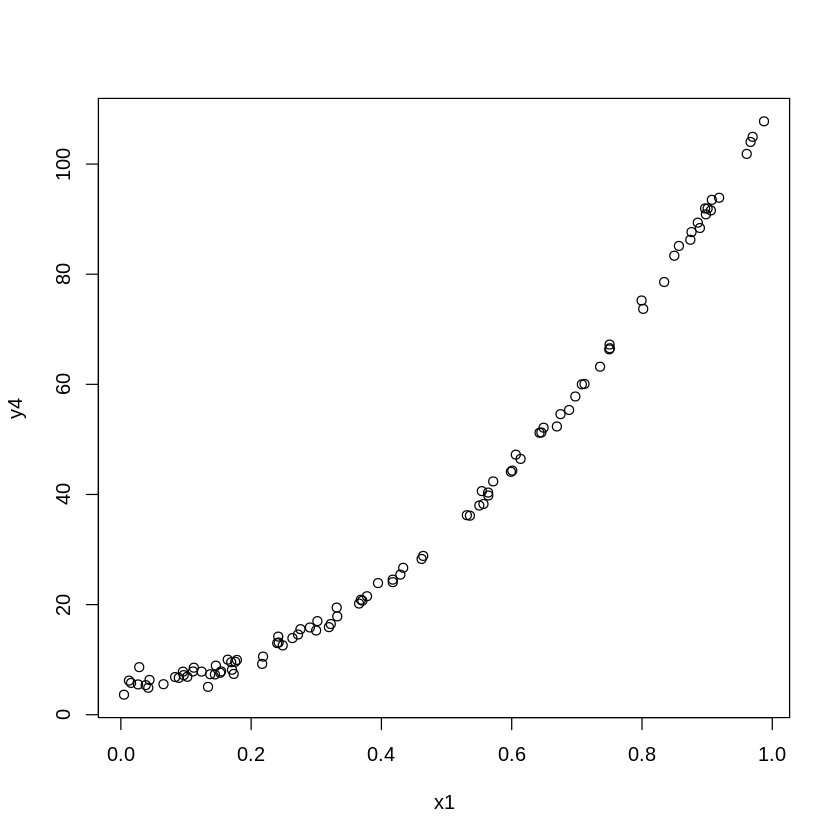

In [ ]:
#========================Part(2)=====================================================
#Training a linear regression model
x1 <- runif(100)
# introduce a slight nonlinearity
#(A)
y1 = 5 + 6*x1 + 0.1*x1*x1 + rnorm(100)
y2 = 5 + 6*x1 + 5*x1*x1 + rnorm(100)
y3 = 5 + 6*x1 + 20*x1*x1 + rnorm(100)
y4 = 5 + 6*x1 + 100*x1*x1 + rnorm(100)

plot(x1,y1)
model1 <- lm(y1 ~ x1)
summary(model1)

plot(x1,y2)
model2 <- lm(y2 ~ x1)
summary(model2)

plot(x1,y3)
model3 <- lm(y3 ~ x1)
summary(model3)

plot(x1,y4)
model4 <- lm(y4 ~ x1)
summary(model4)

#Creating a test set (test vector)

#EDIT: We renamed the variable as x1 instead of xtest (in previous versions)
#becaues the lm function searches in the formula for variables named
#with x1 and not any other name.
#So, if you used xtest, the lm function will not know what is xtest and
#a random plot will be generated.

x1 <- runif(100)

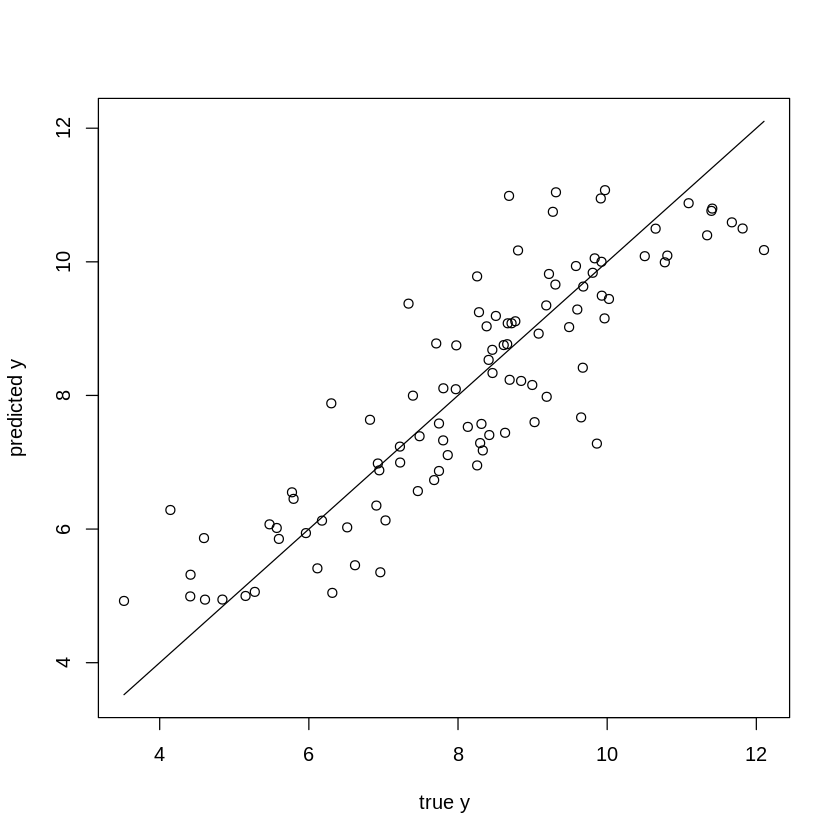

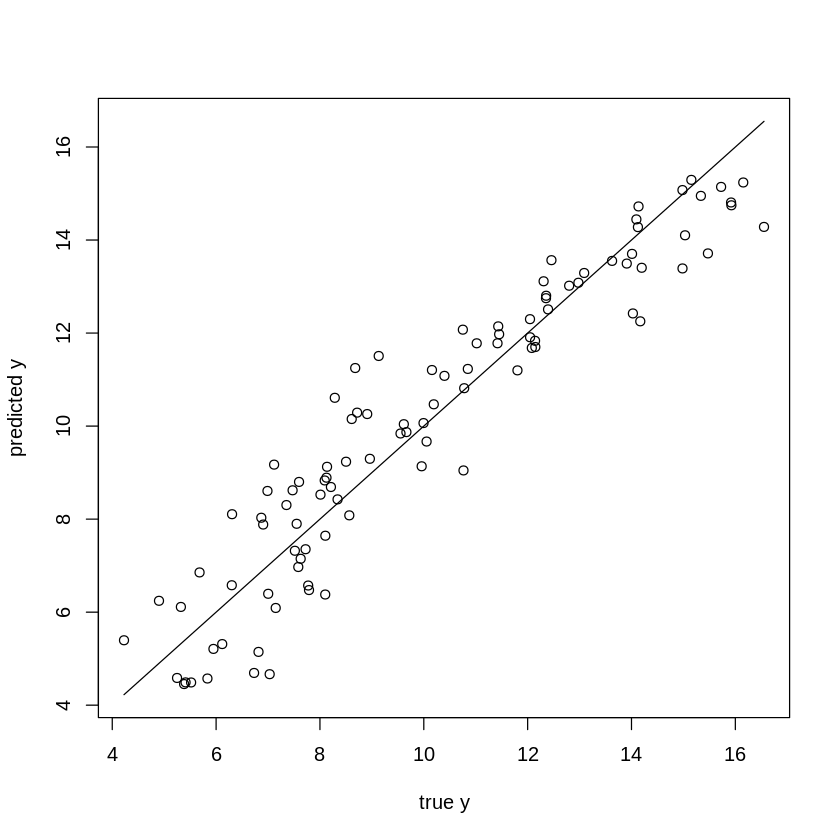

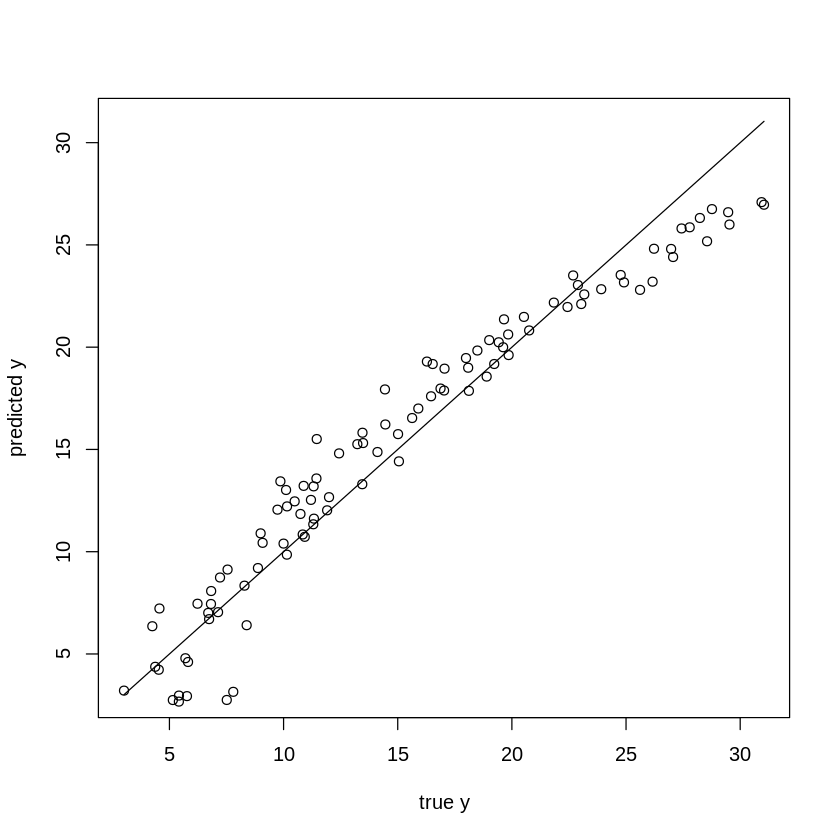

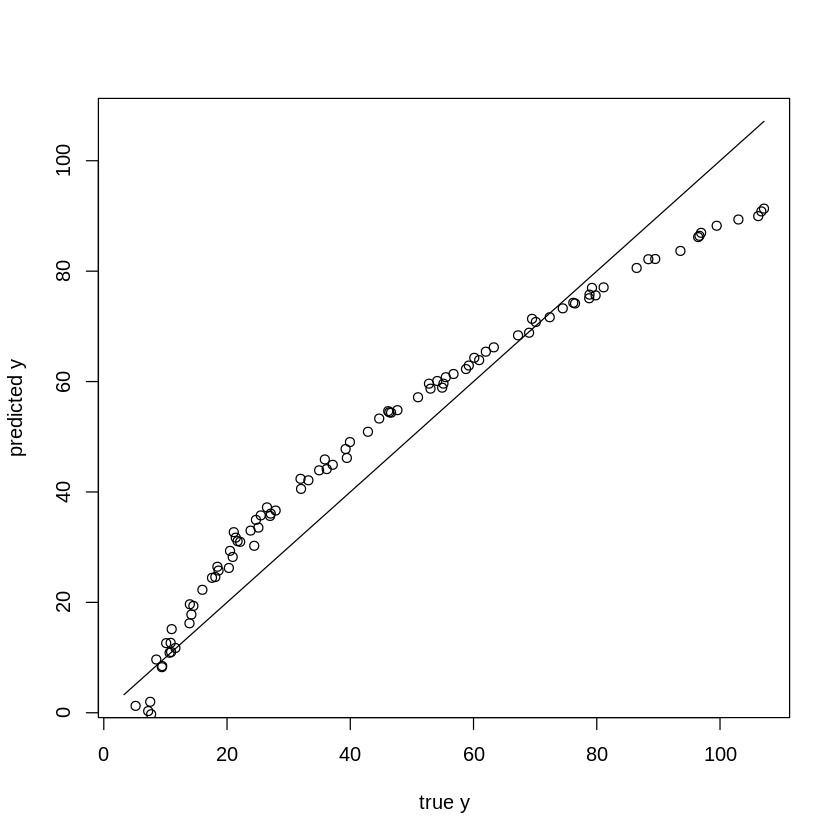

In [ ]:
#(B)
ytrue1 = 5 + 6*x1 + 0.1*x1*x1 + rnorm(100)  # same equation of y1 but on xtest to get true y for xtest

ypred1 <- predict(model1, data.frame(x1))

par(mfrow=c(1,1))
plot(ytrue1, ytrue1, type="l", xlab="true y", ylab="predicted y")
points(ytrue1, ypred1)


ytrue2 = 5 + 6*x1 + 5*x1*x1 + rnorm(100)  # same equation of y1 but on xtest to get true y for xtest

ypred2 <- predict(model2, data.frame(x1))

par(mfrow=c(1,1))
plot(ytrue2, ytrue2, type="l", xlab="true y", ylab="predicted y")
points(ytrue2, ypred2)


ytrue3 = 5 + 6*x1 + 20*x1*x1 + rnorm(100)  # same equation of y1 but on xtest to get true y for xtest

ypred3 <- predict(model3, data.frame(x1))

par(mfrow=c(1,1))
plot(ytrue3, ytrue3, type="l", xlab="true y", ylab="predicted y")
points(ytrue3, ypred3)


ytrue4 = 5 + 6*x1 + 100*x1*x1 + rnorm(100)  # same equation of y1 but on xtest to get true y for xtest

ypred4 <- predict(model4, data.frame(x1))

par(mfrow=c(1,1))
plot(ytrue4, ytrue4, type="l", xlab="true y", ylab="predicted y")
points(ytrue4, ypred4)


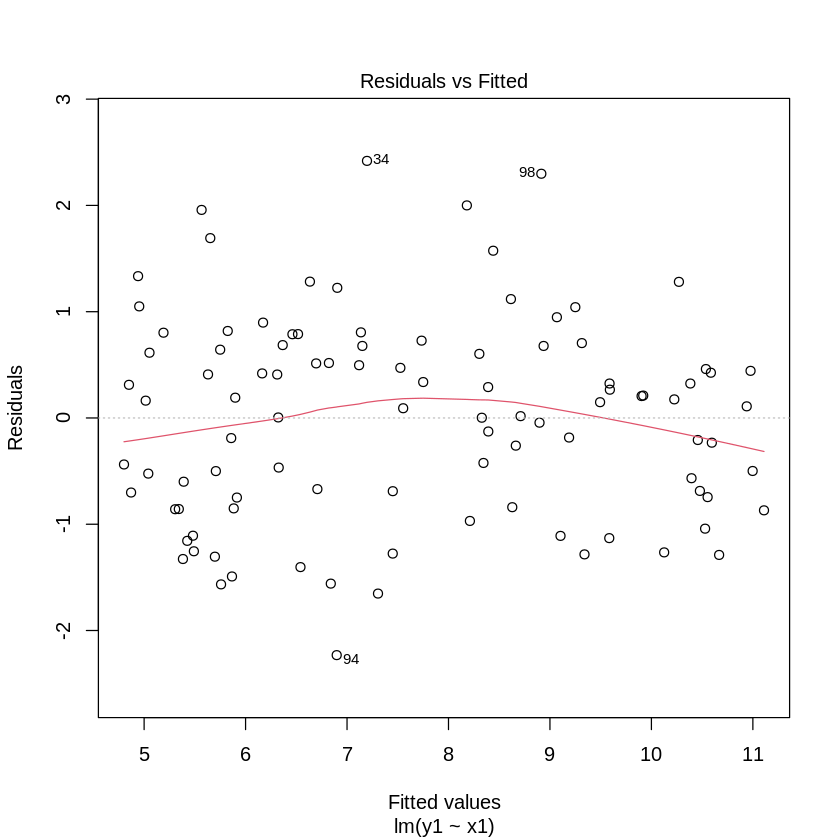

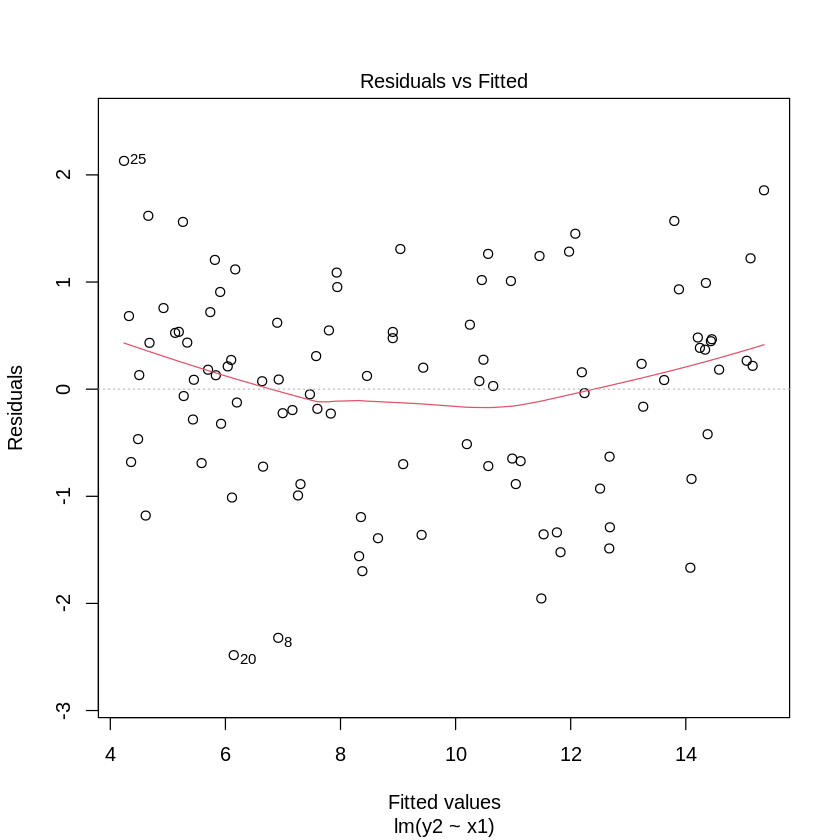

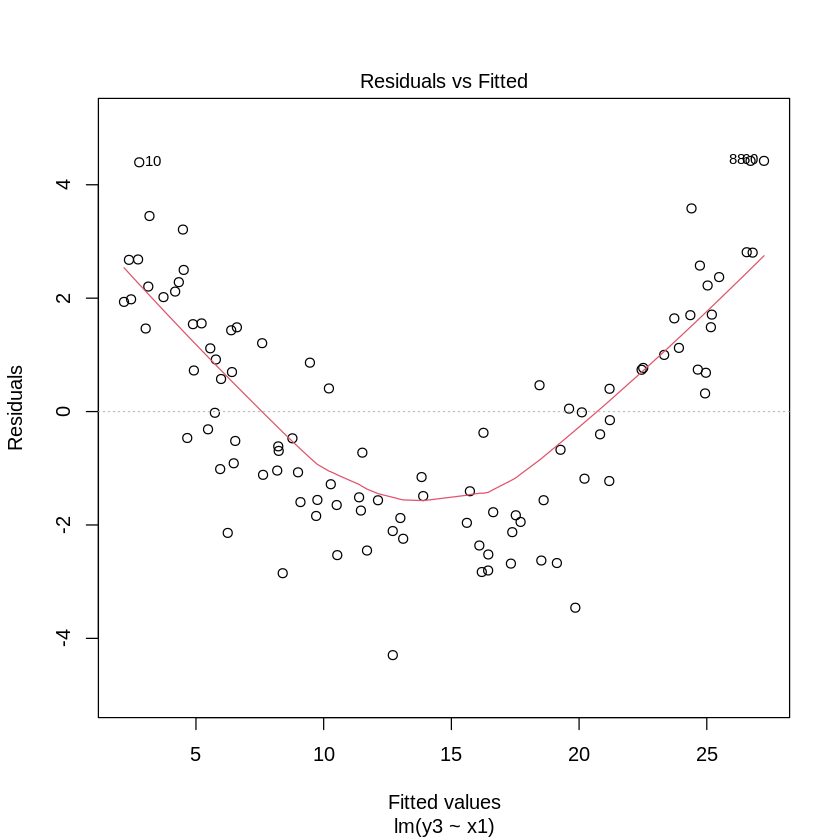

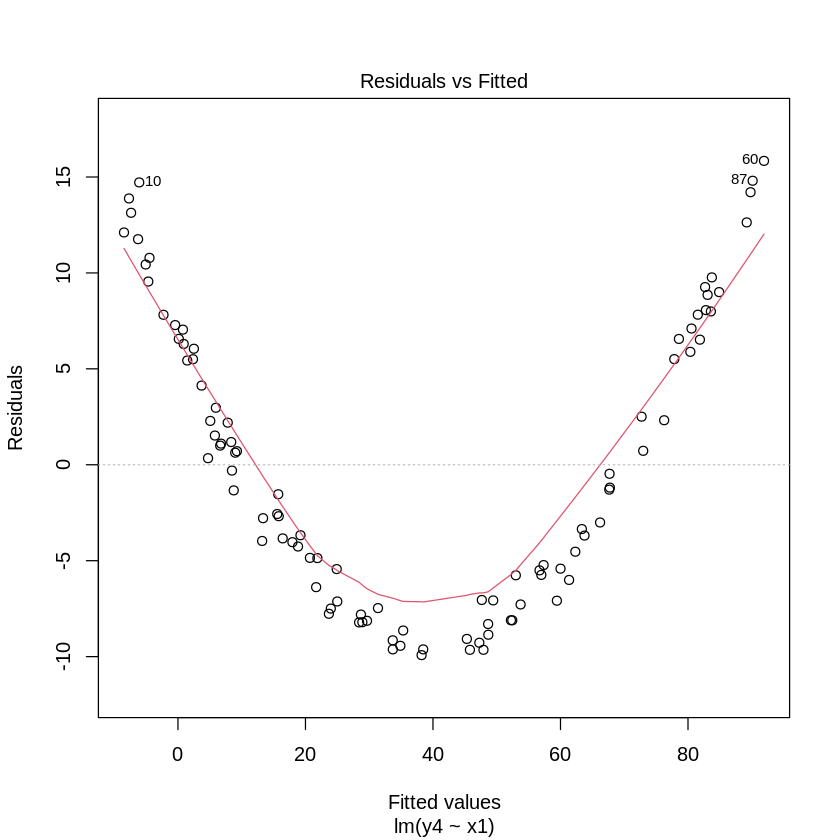

In [ ]:
# graphic dignostic (cont.)
par(mfrow=c(1,1)) # parameters for the next plot
plot(model1, 1) # plot the diagnostic graphs

par(mfrow=c(1,1)) # parameters for the next plot
plot(model2, 1) # plot the diagnostic graphs

par(mfrow=c(1,1)) # parameters for the next plot
plot(model3, 1) # plot the diagnostic graphs

par(mfrow=c(1,1)) # parameters for the next plot
plot(model4, 1) # plot the diagnostic graphs


#(Q5)What do you conclude about the residual plot? Is it a good residual plot?
"
The residual values serve as a measure of the goodness of fit, indicating how well the line fits with the data.                                                                                                   In this case, we observe a linear pattern in the plot, given the negligible coefficient associated with the non-linear term, and the data was generated with a consistent variance.
"
#(Q6)Now, change the coefficient of the non-linear term in the original model for (A) training
#and (B) testing to a large value instead. What do you notice about the residual plot?
#===============================End of Part(2)=============================================


In [ ]:
#=================================Part(3)==================================================
#(Q7) Import the dataset LungCapData.tsv. What are the variables in this dataset?
dfm <- read.csv("/content/LungCapData.tsv", sep = "\t")
names(dfm)
# 'LungCap''Age''Height''Smoke''Gender''Caesarean'

[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

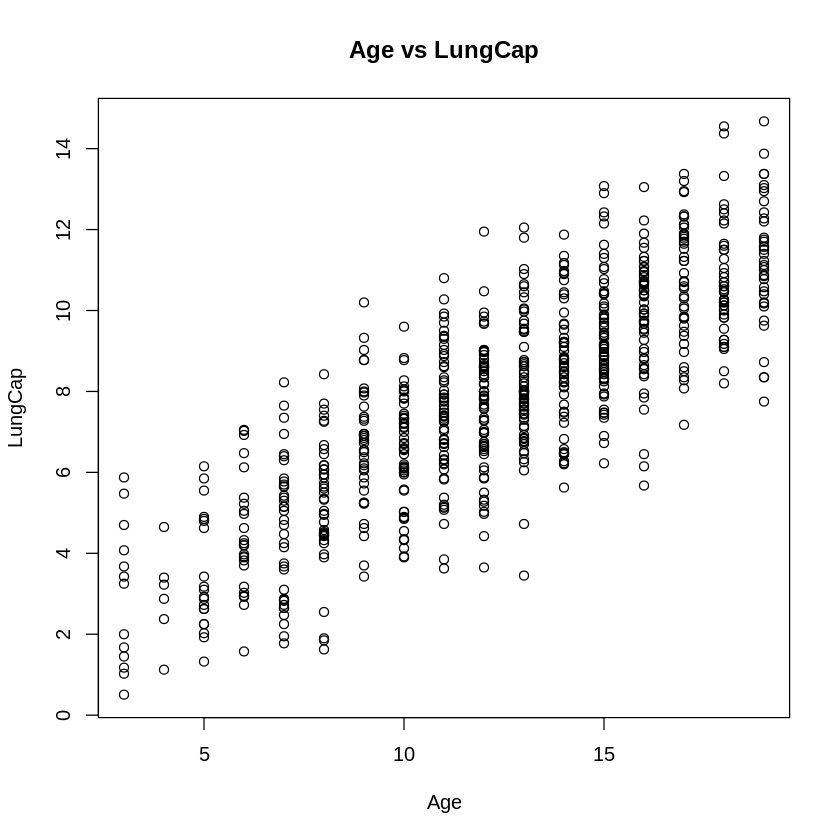

In [ ]:
#(Q8) Draw a scatter plot of Age (x-axis) vs. LungCap (y-axis). Label x-axis "Age" and y-axis "LungCap"
plot(x = dfm$Age,y = dfm$LungCap,
     xlab = "Age",
     ylab = "LungCap",
     main = "Age vs LungCap"
)

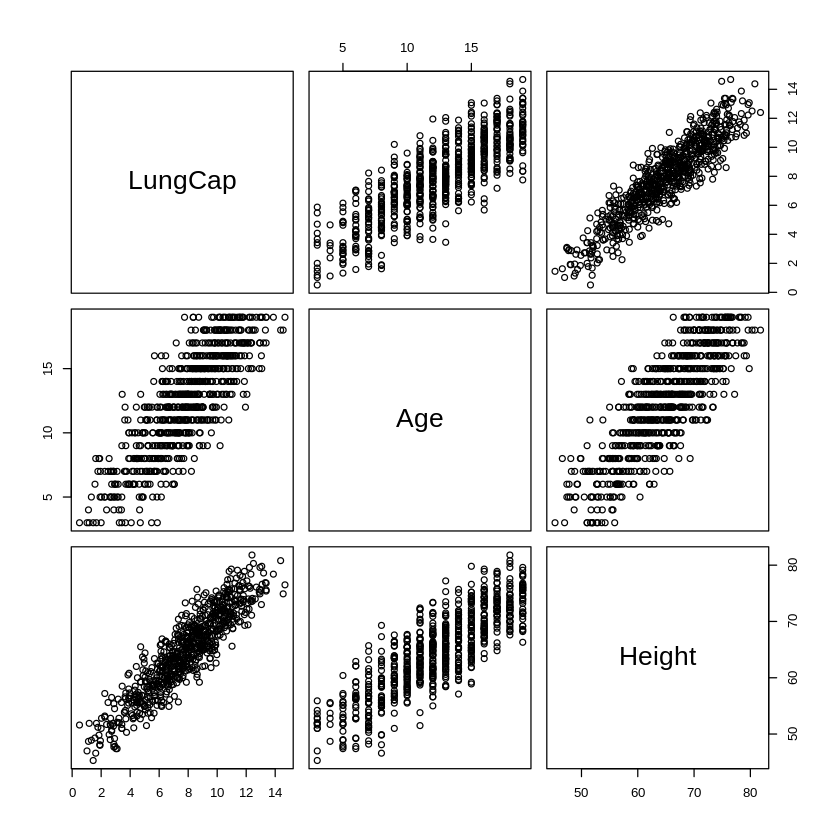

In [ ]:
#(Q9) Draw a pair-wise scatter plot between Lung Capacity, Age and Height.
#Check the slides for how to plot a pair-wise scatterplot
pairs(dfm[,c("LungCap","Age", "Height")])

In [ ]:
#(Q10) Calculate correlation between Age and LungCap, and between Height and LungCap.
#Hint: You can use the function cor
cor(dfm[,c("LungCap","Age", "Height")])


,LungCap,Age,Height
LungCap,1.0000000,0.8196749,0.9121873
Age,0.8196749,1.0000000,0.8357368
Height,0.9121873,0.8357368,1.0000000


In [ ]:
#(Q11) Which of the two input variables (Age, Height) are more correlated to the
#dependent variable (LungCap)?

# ==> Height


In [ ]:
#(Q12) Do you think the two variables (Height and LungCap) are correlated ? why ?
cor.test(dfm$Height, dfm$LungCap)

"
Yes they are correlated
because they have a large correlation coefficient, very close to 1.
i.e., increase in height indicates an increase in lung capacity and vice versa.
Also using cor.test with Pearson's product-moment correlation we verify this hypothesis.
"


	Pearson's product-moment correlation

data:  dfm$Height and dfm$LungCap
t = 59.856, df = 723, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8990911 0.9236522
sample estimates:
      cor 
0.9121873 


[1] "\nYes they are correlated \nbecause they have a large correlation coefficient, very close to 1. \ni.e., increase in height indicates an increase in lung capacity and vice versa.\n"

In [ ]:
#(Q13) Fit a liner regression model where the dependent variable is LungCap
#and use all other variables as the independent variables
fit_lungCap <- lm(LungCap ~ Age + Height + Smoke + Gender + Caesarean, data = dfm)


In [ ]:
#(Q14) Show a summary of this model
(summ = summary(fit_lungCap))



Call:
lm(formula = LungCap ~ Age + Height + Smoke + Gender + Caesarean, 
    data = dfm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3388 -0.7200  0.0444  0.7093  3.0172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -11.32249    0.47097 -24.041  < 2e-16 ***
Age            0.16053    0.01801   8.915  < 2e-16 ***
Height         0.26411    0.01006  26.248  < 2e-16 ***
Smokeyes      -0.60956    0.12598  -4.839 1.60e-06 ***
Gendermale     0.38701    0.07966   4.858 1.45e-06 ***
Caesareanyes  -0.21422    0.09074  -2.361   0.0185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.02 on 719 degrees of freedom
Multiple R-squared:  0.8542,	Adjusted R-squared:  0.8532 
F-statistic: 842.8 on 5 and 719 DF,  p-value: < 2.2e-16


In [ ]:
#(Q15) What is the R-squared value here ? What does R-squared indicate?
summ$r.squared


[1] 0.8542478

In [ ]:
#(Q16) Show the coefficients of the linear model. Do they make sense?
#If not, which variables don't make sense? What should you do?
summ$coefficients


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-11.3224856,0.47097384,-24.040583,3.518644e-94
Age,0.1605296,0.01800726,8.914715,3.988466e-18
Height,0.2641128,0.01006215,26.248142,5.049675e-107
Smokeyes,-0.6095592,0.12597708,-4.838652,1.600357e-06
Gendermale,0.3870117,0.07965729,4.858459,1.452909e-06
Caesareanyes,-0.2142182,0.09073684,-2.360873,1.849787e-02


1 
0.5641957

Warning message in abline(fit_lungCap, col = "red"):
“only using the first two of 6 regression coefficients”


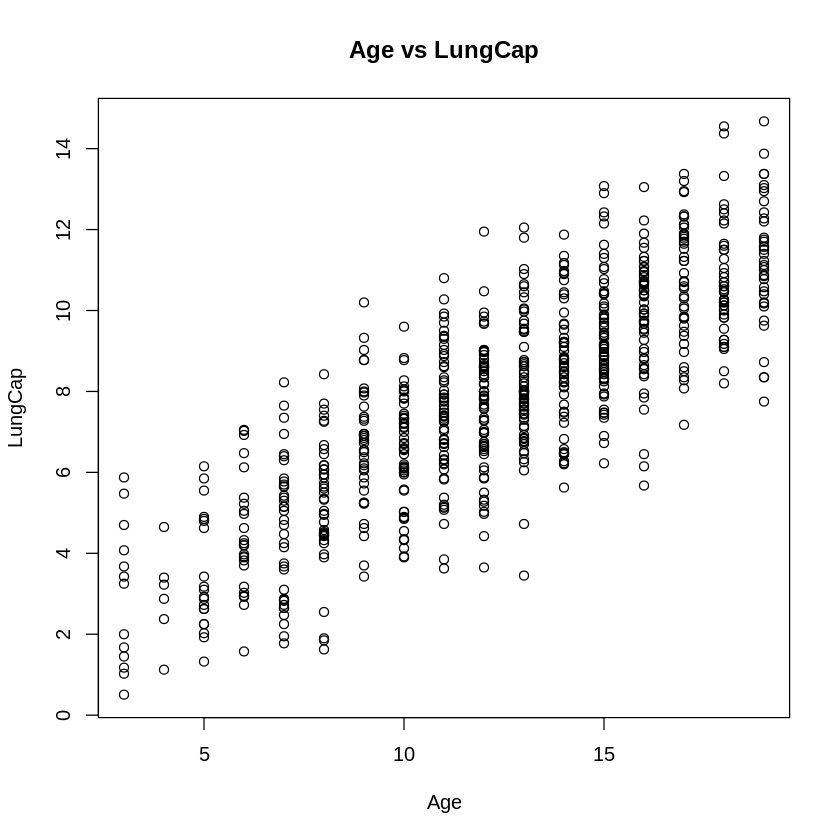

In [ ]:
#(Q17) Redraw a scatter plot between Age and LungCap. Display/Overlay the linear model (a line) over it.
#Hint: Use the function abline(model, col="red").
#Note (1) : A warning will be displayed that this function will display only the first two
#           coefficients in the model. It's OK.
#Note (2) : If you are working correctly, the line will not be displayed on the plot. Why?

test_pt = data.frame(0.01, 45, 'no', 'female', 'no')
names(test_pt) = c('Age', 'Height', 'Smoke', 'Gender', 'Caesarean')
predict(fit_lungCap, test_pt)

plot(x = dfm$Age,y = dfm$LungCap,
     xlab = "Age",
     ylab = "LungCap",
     main = "Age vs LungCap"
)
abline(fit_lungCap, col="red")


In [ ]:
#(Q18)Repeat Q13 but with these variables Age, Smoke and Cesarean as the only independent variables.
fit_lungCap <- lm(LungCap ~ Age + Smoke + Caesarean, data = dfm)



Call:
lm(formula = LungCap ~ Age + Smoke + Caesarean, data = dfm)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7428 -1.0580 -0.0490  0.9985  4.2319 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.10867    0.18419   6.019 2.79e-09 ***
Age           0.55617    0.01439  38.639  < 2e-16 ***
Smokeyes     -0.64310    0.18681  -3.443 0.000609 ***
Caesareanyes -0.14603    0.13468  -1.084 0.278610    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.514 on 721 degrees of freedom
Multiple R-squared:  0.6778,	Adjusted R-squared:  0.6764 
F-statistic: 505.5 on 3 and 721 DF,  p-value: < 2.2e-16


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.1086723,0.18418699,6.019276,2.788391e-09
Age,0.5561667,0.01439403,38.638710,8.142669e-178
Smokeyes,-0.6431029,0.18680655,-3.442614,6.093803e-04
Caesareanyes,-0.1460278,0.13467911,-1.084265,2.786098e-01


Warning message in abline(fit_lungCap, col = "red"):
“only using the first two of 4 regression coefficients”


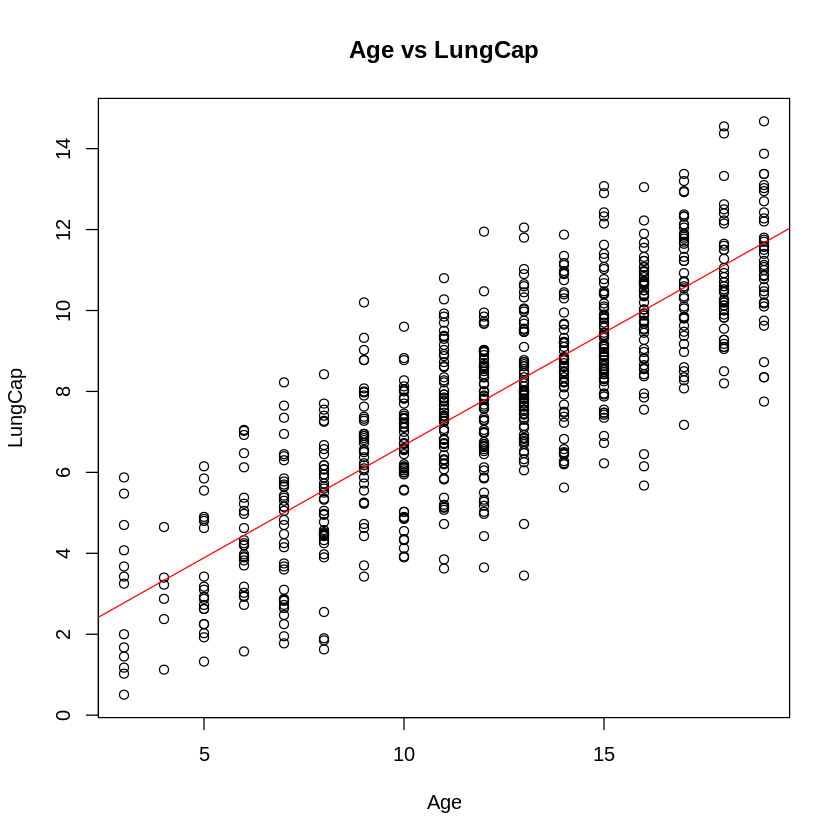

In [ ]:
#(Q19)Repeat Q16, Q17 for the new model. What happened?
(summ = summary(fit_lungCap))
summ$coefficients

plot(x = dfm$Age,y = dfm$LungCap,
     xlab = "Age",
     ylab = "LungCap",
     main = "Age vs LungCap"
)
abline(fit_lungCap, col="red")


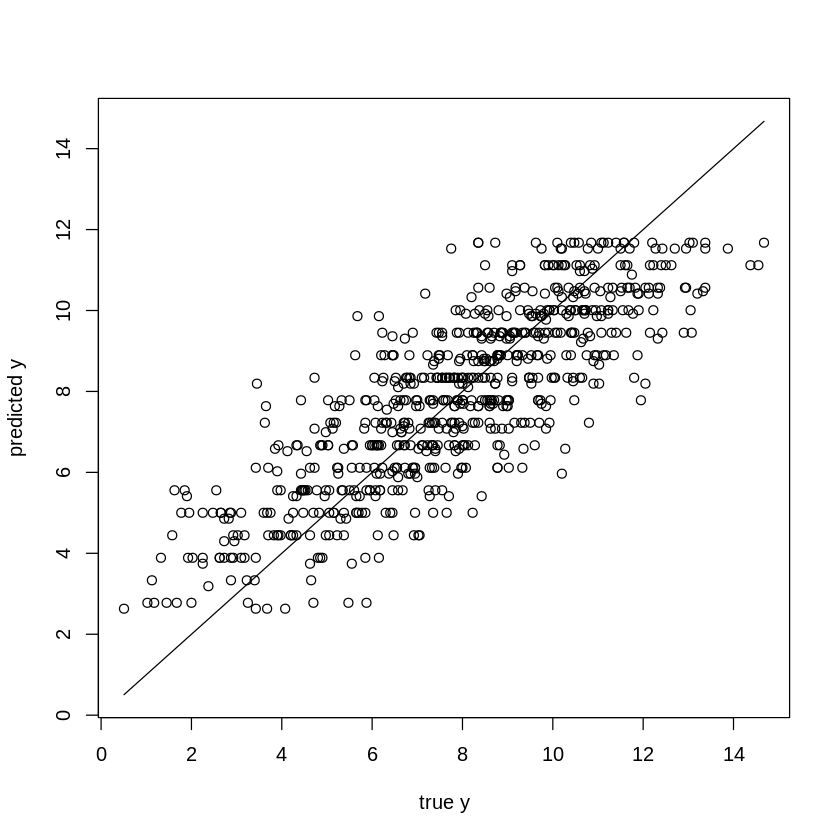

In [ ]:
#(Q20)Predict results for this regression line on the training data.
ypred <- predict(fit_lungCap)
par(mfrow=c(1,1))
plot(dfm$LungCap,dfm$LungCap, type="l", xlab="true y", ylab="predicted y") # ploting the ideal line
points(dfm$LungCap, ypred) # plotting the predicted points


In [ ]:
#(Q21)Calculate the mean squared error (MSE)of the training data.
mean(summ$residuals^2)


[1] 2.280169